In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#load the dataset
road_accidents = pd.read_csv('dft-road-casualty-statistics-accident-2010-2021.csv')

C:\Users\Haywh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,3,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
road_accidents.head()

,Unnamed: 0,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,7128354,201001BS70003,2010,01BS70003,527580.0,177730.0,-0.164002,51.484087,1,3,...,0,1,8,2,0,0,1,1,2,E01002900
1,7128355,201001BS70004,2010,01BS70004,525340.0,180470.0,-0.195273,51.509212,1,3,...,5,4,2,2,0,0,1,1,2,E01002884
2,7128356,201001BS70006,2010,01BS70006,524800.0,180300.0,-0.203110,51.507804,1,3,...,5,1,1,1,0,0,1,1,2,E01002871
3,7128357,201001BS70007,2010,01BS70007,525080.0,180920.0,-0.198858,51.513314,1,3,...,0,4,1,1,0,0,1,1,2,E01002886
4,7128358,201001BS70008,2010,01BS70008,526760.0,177740.0,-0.175802,51.484361,1,3,...,0,4,1,2,0,0,1,1,2,E01002845


In [4]:
road_accidents.shape

(1575557, 37)

In [5]:
road_accidents.columns

Index(['Unnamed: 0', 'accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [6]:
road_accidents = road_accidents.loc[:, ~road_accidents.columns.str.contains('^Unnamed')]

In [7]:
road_accidents.head(2)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,201001BS70003,2010,01BS70003,527580.0,177730.0,-0.164002,51.484087,1,3,2,...,0,1,8,2,0,0,1,1,2,E01002900
1,201001BS70004,2010,01BS70004,525340.0,180470.0,-0.195273,51.509212,1,3,1,...,5,4,2,2,0,0,1,1,2,E01002884


#### EDA

In [8]:
road_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575557 entries, 0 to 1575556
Data columns (total 36 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   accident_index                               1575557 non-null  object 
 1   accident_year                                1575557 non-null  int64  
 2   accident_reference                           1575557 non-null  object 
 3   location_easting_osgr                        1575390 non-null  float64
 4   location_northing_osgr                       1575390 non-null  float64
 5   longitude                                    1575380 non-null  float64
 6   latitude                                     1575380 non-null  float64
 7   police_force                                 1575557 non-null  int64  
 8   accident_severity                            1575557 non-null  int64  
 9   number_of_vehicles                           1

In [9]:
road_accidents.isna().sum()

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          167
location_northing_osgr                         167
longitude                                      177
latitude                                       177
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [10]:
#drop null values
road_accidents.dropna(inplace=True)

<AxesSubplot:>

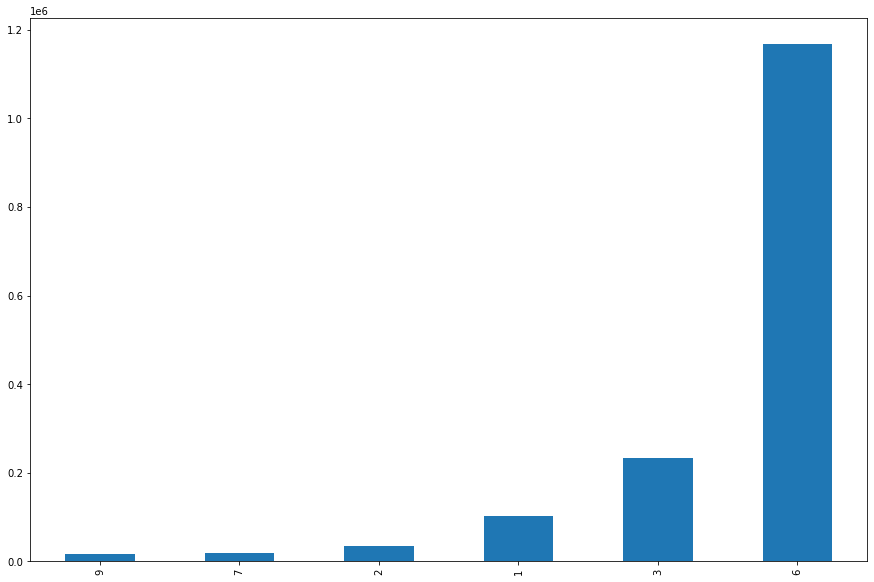

In [11]:
plt.figure(figsize=(15, 10))
road_accidents['road_type'].value_counts().sort_values().plot.bar()

Text(0.5, 1.0, 'Number of accidents per year')

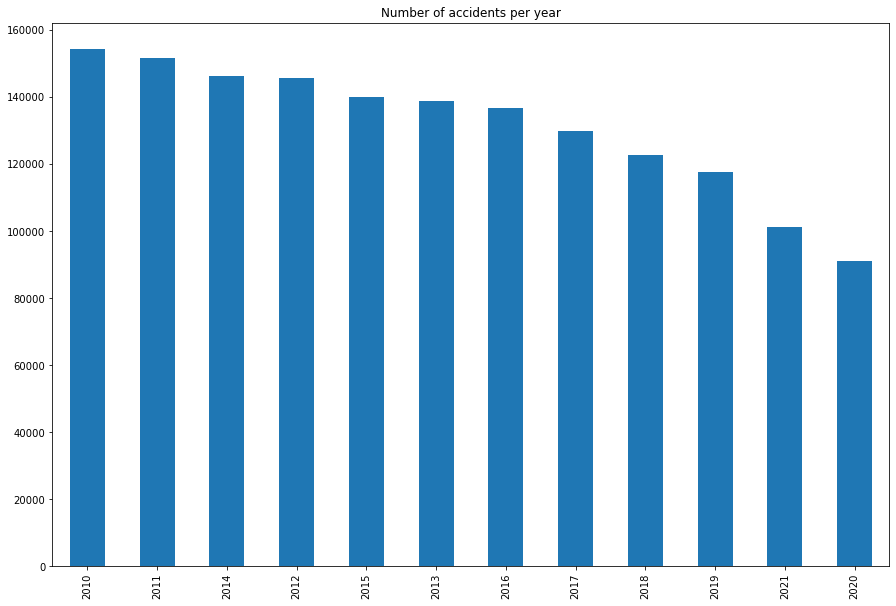

In [12]:
plt.figure(figsize=(15, 10))
road_accidents['accident_year'].value_counts().plot.bar()
plt.title('Number of accidents per year')

<AxesSubplot:>

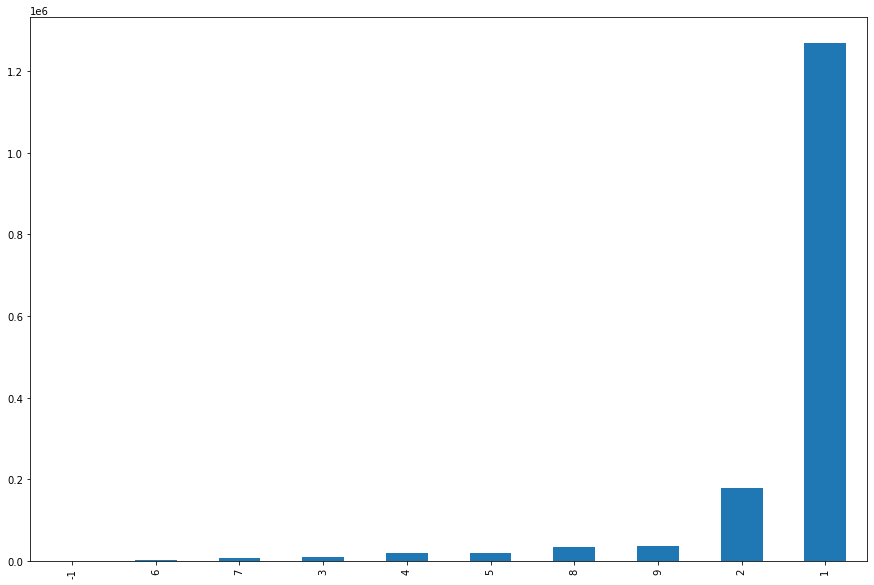

In [13]:
plt.figure(figsize=(15, 10))
road_accidents['weather_conditions'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

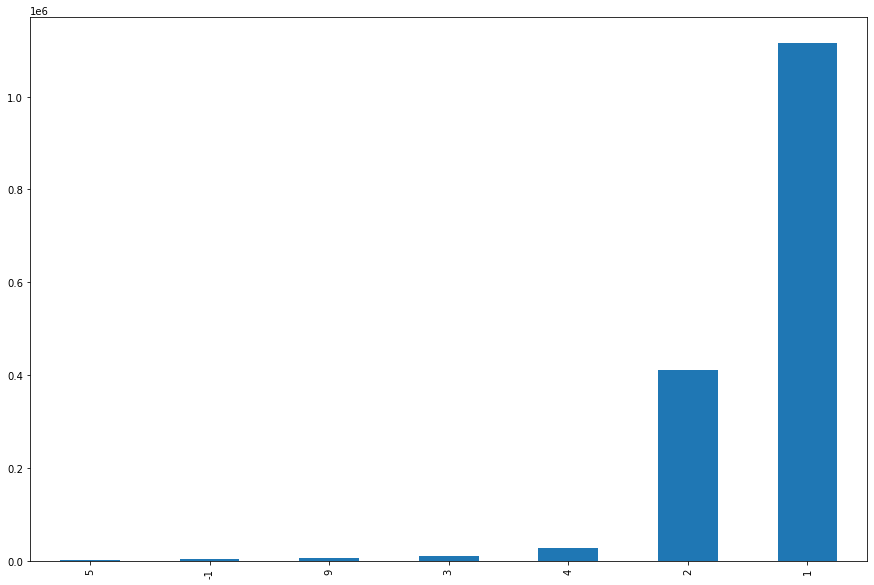

In [14]:
plt.figure(figsize=(15, 10))
road_accidents['road_surface_conditions'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

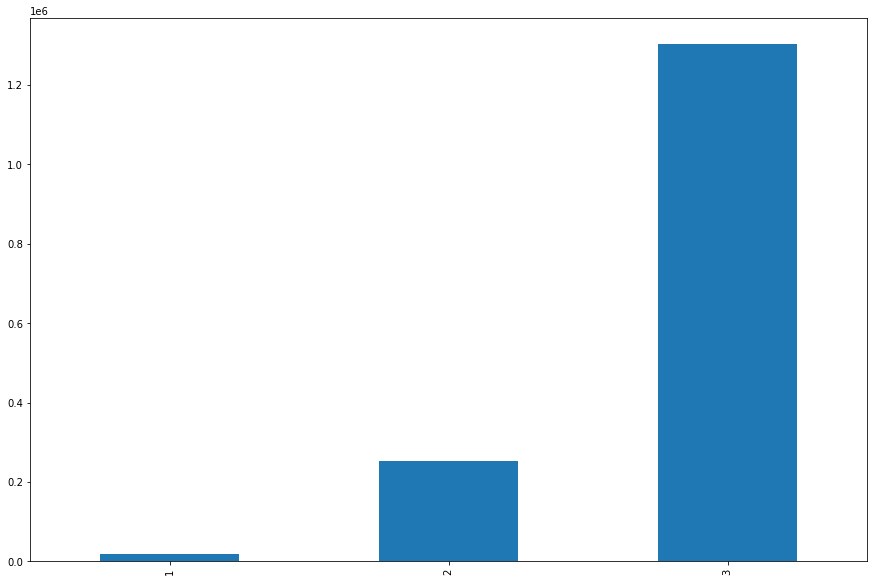

In [15]:
plt.figure(figsize=(15, 10))
road_accidents['accident_severity'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

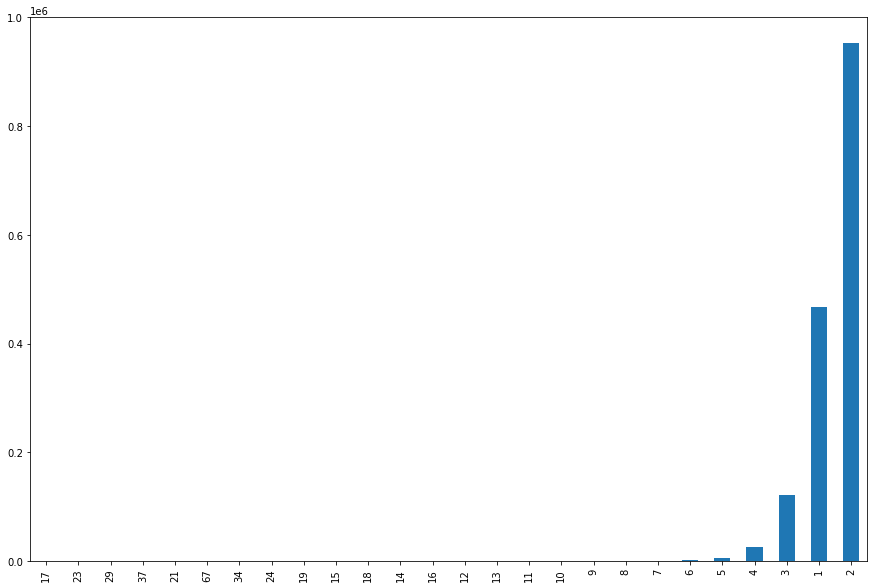

In [16]:
plt.figure(figsize=(15, 10))
road_accidents['number_of_vehicles'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

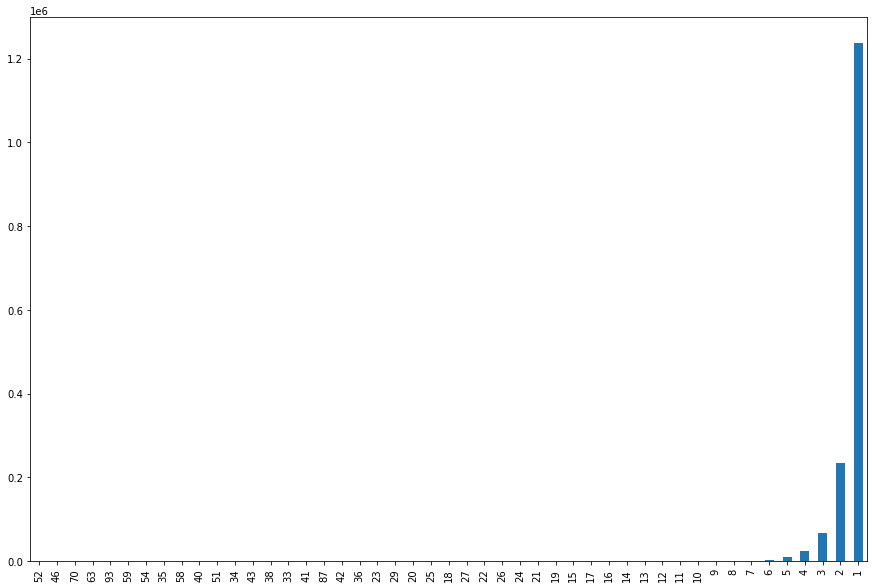

In [17]:
plt.figure(figsize=(15, 10))
road_accidents['number_of_casualties'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

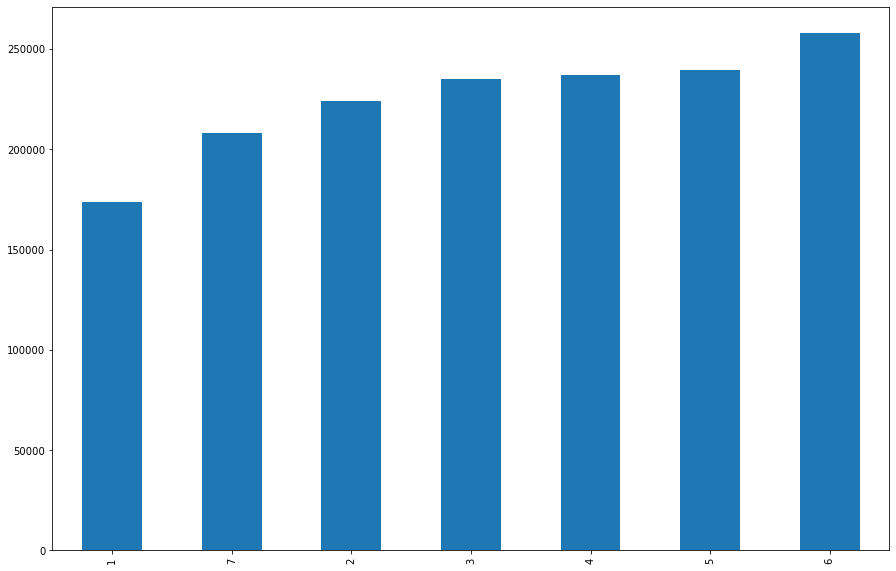

In [18]:
plt.figure(figsize=(15, 10))
road_accidents['day_of_week'].value_counts().sort_values().plot.bar()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '9')])

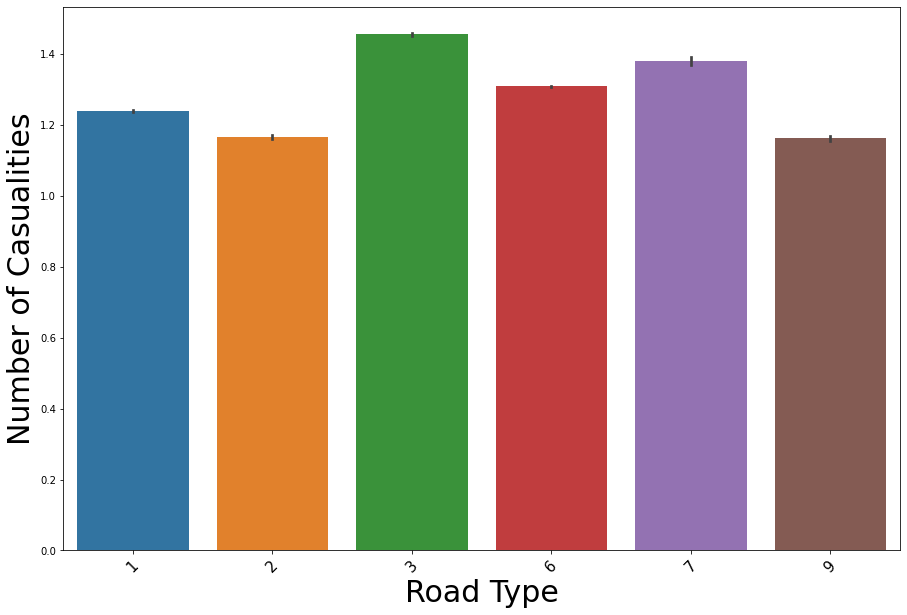

In [19]:
plt.figure(figsize=(15, 10))
sns.barplot(x = "road_type", y = "number_of_casualties", data = road_accidents)
plt.ylabel("Number of Casualities", fontsize = 30)
plt.xlabel("Road Type", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)

<AxesSubplot:xlabel='road_type', ylabel='count'>

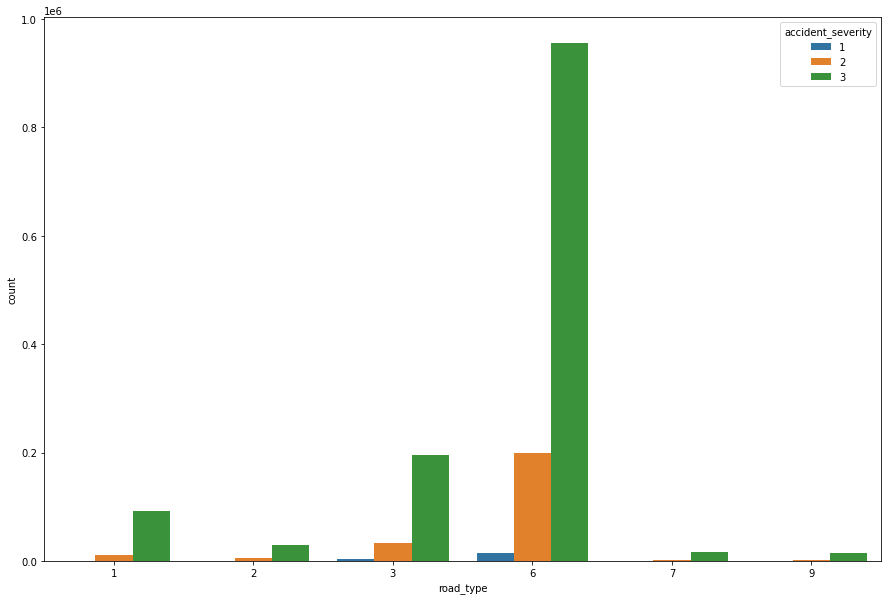

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(x='road_type', hue='accident_severity', data=road_accidents)

In [21]:
#drop columns that won't be needed
cols_remove = [
    'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude','latitude',
    'local_authority_ons_district', 'local_authority_highway','lsoa_of_accident_location'
]

new_road_acc_df = road_accidents.drop(cols_remove, axis=1)

In [22]:
#convert date and time columns to datetime series
new_road_acc_df['date'] = pd.to_datetime(new_road_acc_df['date'])
new_road_acc_df['time'] = pd.to_datetime(new_road_acc_df['time'])

In [23]:
new_road_acc_df['accident_month'] = new_road_acc_df['date'].dt.month

In [24]:
new_road_acc_df['hour'] = new_road_acc_df['time'].dt.hour

In [25]:
road_accidents.accident_severity.value_counts()

3    1303812
2     251921
1      19610
Name: accident_severity, dtype: int64

Since 1 has the lowest count, it will be dropped

In [26]:
new_road_acc_df.drop(new_road_acc_df[new_road_acc_df['accident_severity'] == 1].index, inplace=True)

In [27]:
new_road_acc_df.accident_severity.value_counts()

3    1303812
2     251921
Name: accident_severity, dtype: int64

In [28]:
#change to the correct data types
new_road_acc_df['police_force'] = new_road_acc_df['police_force'].astype('category')
new_road_acc_df['accident_severity'] = new_road_acc_df['accident_severity'].astype('category')
new_road_acc_df['local_authority_district'] = new_road_acc_df['local_authority_district'].astype('category')
new_road_acc_df['first_road_class'] = new_road_acc_df['first_road_class'].astype('category')
new_road_acc_df['first_road_number'] = new_road_acc_df['first_road_number'].astype('category')
new_road_acc_df['road_type'] = new_road_acc_df['road_type'].astype('category')
new_road_acc_df['junction_detail'] = new_road_acc_df['junction_detail'].astype('category')
new_road_acc_df['junction_control'] = new_road_acc_df['junction_control'].astype('category')
new_road_acc_df['second_road_class'] = new_road_acc_df['second_road_class'].astype('category')
new_road_acc_df['second_road_number'] = new_road_acc_df['second_road_number'].astype('category')
new_road_acc_df['pedestrian_crossing_human_control'] = new_road_acc_df['pedestrian_crossing_human_control'].astype('category')
new_road_acc_df['pedestrian_crossing_physical_facilities'] = new_road_acc_df['pedestrian_crossing_physical_facilities'].astype('category')
new_road_acc_df['light_conditions'] = new_road_acc_df['light_conditions'].astype('category')
new_road_acc_df['weather_conditions'] = new_road_acc_df['weather_conditions'].astype('category')
new_road_acc_df['road_surface_conditions'] = new_road_acc_df['road_surface_conditions'].astype('category')
new_road_acc_df['special_conditions_at_site'] = new_road_acc_df['special_conditions_at_site'].astype('category')
new_road_acc_df['carriageway_hazards'] = new_road_acc_df['carriageway_hazards'].astype('category')
new_road_acc_df['urban_or_rural_area'] = new_road_acc_df['urban_or_rural_area'].astype('category')
new_road_acc_df['did_police_officer_attend_scene_of_accident'] = new_road_acc_df['did_police_officer_attend_scene_of_accident'].astype('category')
new_road_acc_df['trunk_road_flag'] = new_road_acc_df['trunk_road_flag'].astype('category')
new_road_acc_df['accident_month'] = new_road_acc_df['accident_month'].astype('category')
new_road_acc_df['hour'] = new_road_acc_df['hour'].astype('category')

In [29]:
new_road_acc_df.to_csv('updated_acc_data.csv', index=False)

### modelling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

In [31]:
#split the dataset 
features = new_road_acc_df.drop(['accident_index', 'date','accident_severity','time', 'accident_year'], axis=1)
target = new_road_acc_df[['accident_severity']]

In [32]:
features.columns

Index(['police_force', 'number_of_vehicles', 'number_of_casualties',
       'day_of_week', 'local_authority_district', 'first_road_class',
       'first_road_number', 'road_type', 'speed_limit', 'junction_detail',
       'junction_control', 'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'accident_month', 'hour'],
      dtype='object')

In [33]:
features.shape

(1555733, 25)

In [34]:
target.shape

(1555733, 1)

In [35]:
target.head()

,accident_severity
0,3
1,3
2,3
3,3
4,3


In [36]:
#split for modeling
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.5, shuffle=True, random_state=42)

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test,
    test_size=0.5, random_state= 42)

In [37]:
x_train.shape

(777866, 25)

In [38]:
y_train.shape

(777866, 1)

In [39]:
y_test.shape

(388933, 1)

In [40]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, class_weight='balanced') 



In [41]:
# Training the model on the training dataset
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(class_weight='balanced')

In [42]:
# performing predictions on the test dataset
y_pred = clf.predict(x_test)

In [43]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8334031825532933


In [44]:
#create a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.35      0.03      0.05     63269
           3       0.84      0.99      0.91    325664

    accuracy                           0.83    388933
   macro avg       0.59      0.51      0.48    388933
weighted avg       0.76      0.83      0.77    388933



It has been observed that the model does not seem to be predicting accurately, this could be due to the large difference between the different accident severity levels. This can be resolved by downsampling the accident severity levels


#### Downsampling the Accident Severity

In [45]:
import numpy as np

In [46]:
#get the value count
num_class = new_road_acc_df['accident_severity'].value_counts()
num_class

3    1303812
2     251921
Name: accident_severity, dtype: int64

In [47]:
new_road_acc_df= pd.concat([new_road_acc_df[new_road_acc_df['accident_severity']==num_class.idxmin()],\
new_road_acc_df[new_road_acc_df['accident_severity']!=num_class.idxmin()].sample(min(num_class))])

new_road_acc_df.accident_severity.value_counts()

2    251921
3    251921
Name: accident_severity, dtype: int64

The accident severity levels have been downsized, the dataset will be split and a model will be built again

In [48]:
features = new_road_acc_df.drop(['accident_index', 'date','accident_severity','time', 'accident_year'], axis=1)
target = new_road_acc_df[['accident_severity']]

In [49]:
features.columns

Index(['police_force', 'number_of_vehicles', 'number_of_casualties',
       'day_of_week', 'local_authority_district', 'first_road_class',
       'first_road_number', 'road_type', 'speed_limit', 'junction_detail',
       'junction_control', 'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'accident_month', 'hour'],
      dtype='object')

In [50]:
features.shape

(503842, 25)

In [51]:
target.shape

(503842, 1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.5, shuffle=True, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
    test_size=0.5, random_state= 42)

In [53]:
X_train.shape

(251921, 25)

In [54]:
y_train.shape

(251921, 1)

In [55]:
y_test.shape

(125960, 1)

In [56]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, class_weight='balanced') 


In [57]:
# Training the model on the training dataset
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(class_weight='balanced')

In [58]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [59]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.605612892981899


In [60]:
#create a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.61      0.62      0.61     63262
           3       0.61      0.59      0.60     62698

    accuracy                           0.61    125960
   macro avg       0.61      0.61      0.61    125960
weighted avg       0.61      0.61      0.61    125960



In [61]:
# Create a confusion matrix using the confusion_matrix function
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[38991, 24271],
       [25406, 37292]], dtype=int64)

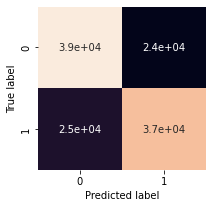

In [62]:
# Create a more visual confusion matrix
import seaborn as sns

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using seaborn's heatmap()
    """
    fix, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_pred)

In [63]:
# Find the most important features using feature importance

feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

local_authority_district                       0.138555
hour                                           0.113774
accident_month                                 0.106615
first_road_number                              0.096839
police_force                                   0.088802
day_of_week                                    0.083139
number_of_vehicles                             0.037405
first_road_class                               0.030776
junction_detail                                0.029748
speed_limit                                    0.029694
number_of_casualties                           0.025462
pedestrian_crossing_physical_facilities        0.024110
second_road_number                             0.023734
weather_conditions                             0.022530
road_surface_conditions                        0.021087
did_police_officer_attend_scene_of_accident    0.020873
light_conditions                               0.019876
road_type                                      0

#### Use the scaled features to train a model

In [64]:
#standardize the features data
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

feature_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(feature_scaled,target, test_size=0.5, shuffle=True, random_state=42)

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test,
    test_size=0.5, random_state= 42)

In [66]:
x_train.shape

(251921, 25)

In [67]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, class_weight='balanced') 

In [68]:
# Training the model on the training dataset
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(class_weight='balanced')

In [69]:
# performing predictions on the test dataset
y_pred = clf.predict(x_test)

In [70]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.607359479199746


There is no much difference between the unscaled features and scaled features

Next, the parameters of random forest will be tuned

#### Hyperparameter Tuning

In [71]:
#tune with Randomized Search CV
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split= [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [72]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = clf,param_distributions = random_grid,
               n_iter = 10, cv = 3, verbose=2, random_state=35, n_jobs = -1)

In [73]:
rf_random.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [74]:
#get the best parameters
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [75]:
#fix in the best parameters into random forest and build a new model

rf2 = RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features='auto', max_depth=20, bootstrap=False)

rf2.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=3,
                       min_samples_split=10)

In [76]:
y_pred2 = rf2.predict(X_test)

In [77]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred2))

ACCURACY OF THE MODEL:  0.6215147665925691


In [78]:
#create a classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           2       0.63      0.61      0.62     63262
           3       0.62      0.63      0.63     62698

    accuracy                           0.62    125960
   macro avg       0.62      0.62      0.62    125960
weighted avg       0.62      0.62      0.62    125960



In [79]:
# Create a confusion matrix using the confusion_matrix function
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred2)

array([[38474, 24788],
       [22886, 39812]], dtype=int64)

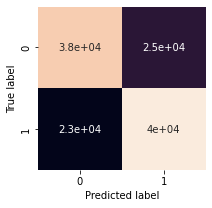

In [80]:
# Create a more visual confusion matrix
import seaborn as sns

def plot_conf_mat(y_test, y_pred2):
    """
    Plots a confusion matrix using seaborn's heatmap()
    """
    fix, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred2),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_pred2)